# Chapter 2 - Exercises continued
## Ex. 2.19

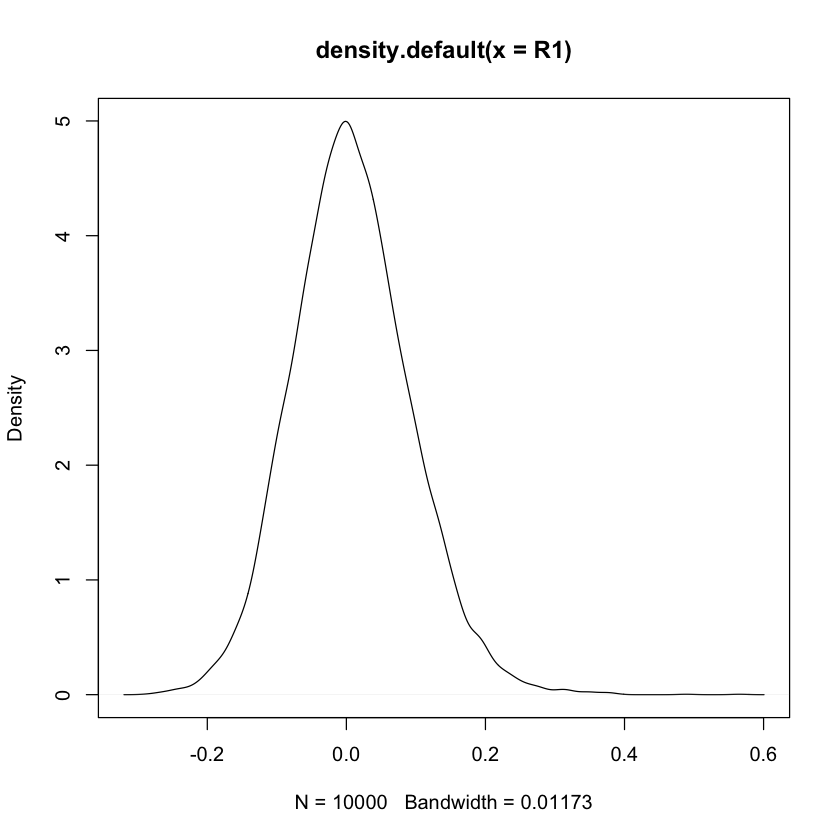

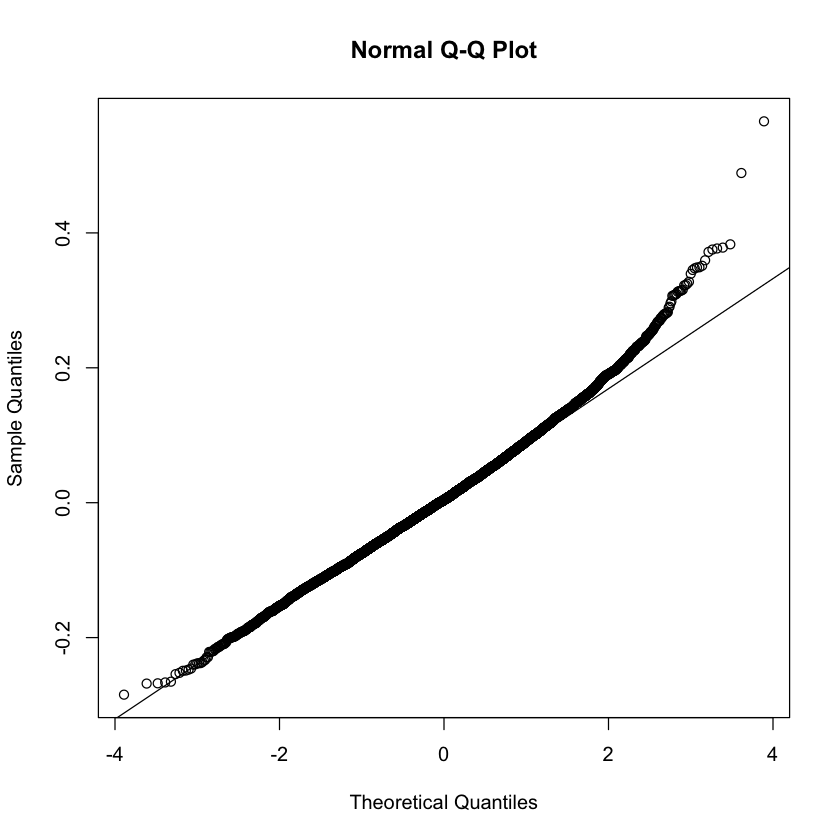

In [51]:
# INPUTS

xi <- 0.005
xi.sigma <- 0.08
alpha <- 10
m <- 10000

#Calculate returns
eps <- rnorm(m)
Z1 <- 1/rgamma(m,rate=alpha,shape=alpha)
R1 <- exp(xi+xi.sigma*sqrt(Z1)*eps)-1

#plot density
plot(density(R1))
qqnorm(R1)
qqline(R1)

## Exercise 2.20

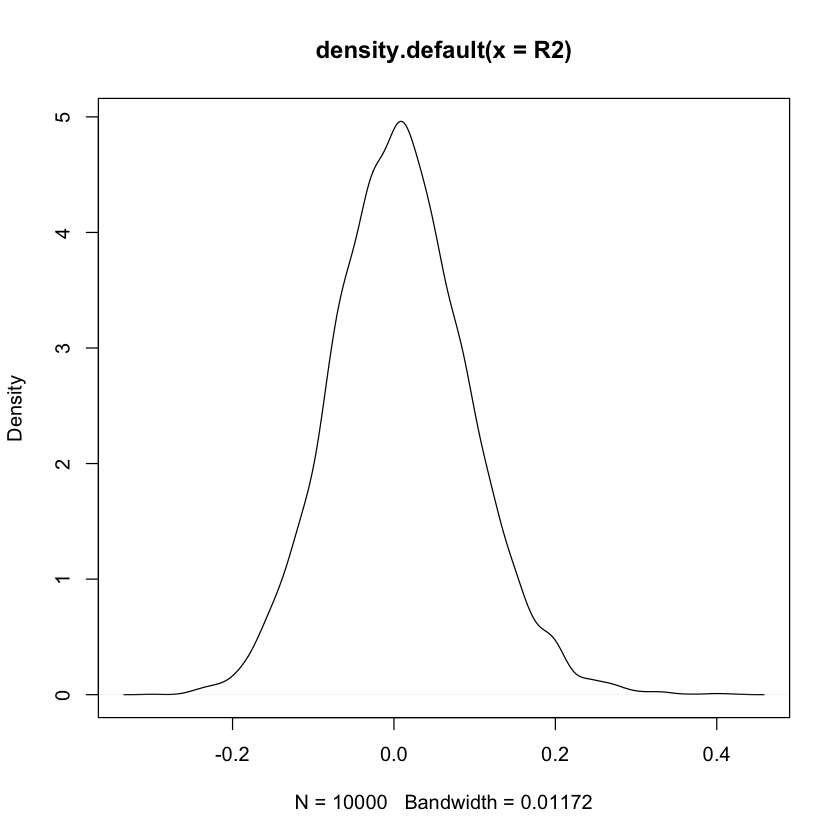

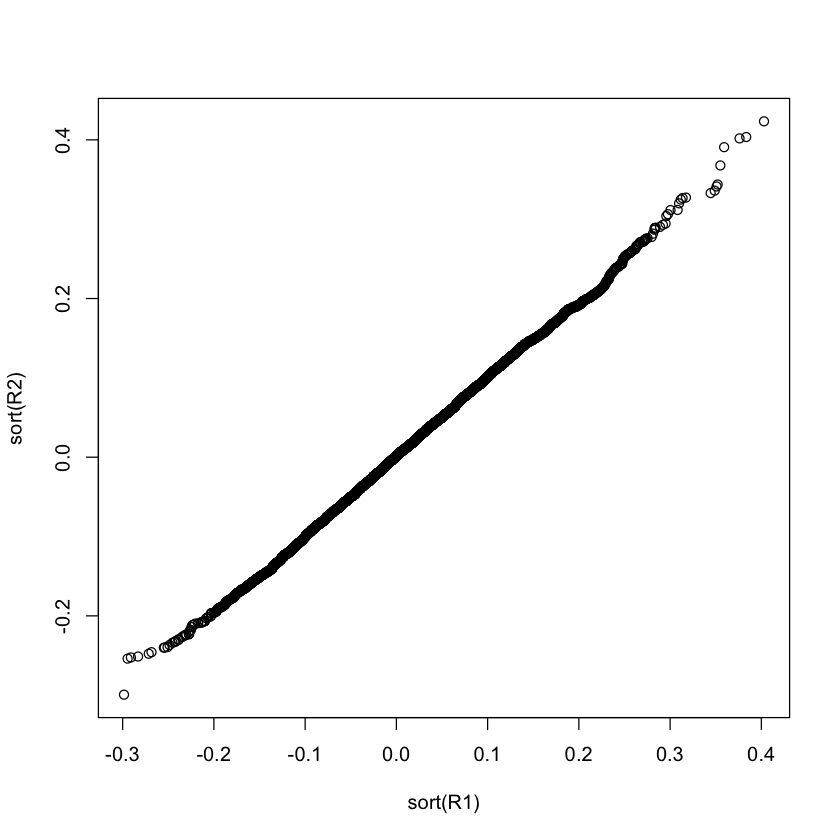

In [31]:
# Inputs

xi <- 0.005
xi.sigma <- 0.08
alpha <- 10
tau <- sqrt(log(1+1/alpha))
m <- 10000


# Generate random variable
eps <- rnorm(m)
eta <- rnorm(m)
Z2 <- exp(0.5*tau^2+tau*eta)
R2 <- exp(xi+xi.sigma*sqrt(Z2)*eps)-1


#plot

plot(density(R2))

plot(sort(R1),sort(R2))

## Exercise 2.21

In [53]:
# Inputs
xi <- 0.05
sigma <- 0.25
rho <- c(0,0.6,0.9)
m <- 100000

# define function
generate_return_portfolio<-function(xi,sigma,rho,m){
    eta1 <- rnorm(m)
    eta2 <- rnorm(m)
    
    eps1 <- eta1 
    eps2 <- rho*eta1+sqrt(1-rho^2)*eta2
    
    R1 <- exp(xi+sigma*eps1)-1
    R2 <- exp(xi+sigma*eps2)-1
    
    R_portfolio<-0.5*(R1+R2)
    
    return(R_portfolio)
}

# generate returns
Rcal1 <- generate_return_portfolio(xi,sigma,rho[1],m)
Rcal2 <- generate_return_portfolio(xi,sigma,rho[2],m)
Rcal3 <- generate_return_portfolio(xi,sigma,rho[3],m)

c(mean(Rcal1),mean(Rcal2),mean(Rcal3))
c(sd(Rcal1),sd(Rcal2),sd(Rcal3))

[1] 0.08527618 0.08377565 0.08548950

[1] 0.1950949 0.2463615 0.2685702

## Exercise 2.22

In [54]:
# Inputs
xi <- 0.05
xi.sigma <- 0.25
alpha <- 5
rho <- c(0,0.6,0.9)
m <- 100000


# define function
generate_return_portfolio_2<-function(xi,xi.sigma,rho,m,alpha){
    eta1 <- rnorm(m)
    eta2 <- rnorm(m)
    
    eps1 <- eta1 
    eps2 <- rho*eta1+sqrt(1-rho^2)*eta2
    
    G <- rgamma(m,shape=alpha,rate=alpha)
    sigma <- xi.sigma/sqrt(G)
    
    R1 <- exp(xi+sigma*eps1)-1
    R2 <- exp(xi+sigma*eps2)-1
    
    R_portfolio<-0.5*(R1+R2)
    
    return(R_portfolio)
}

# generate returns
Rcal1 <- generate_return_portfolio_2(xi,xi.sigma,rho[1],m,alpha)
Rcal2 <- generate_return_portfolio_2(xi,xi.sigma,rho[2],m,alpha)
Rcal3 <- generate_return_portfolio_2(xi,xi.sigma,rho[3],m,alpha)

#output
c(mean(Rcal1),mean(Rcal2),mean(Rcal3))
c(sd(Rcal1),sd(Rcal2),sd(Rcal3))

[1] 0.09301773 0.09428092 0.09252631

[1] 0.2268645 0.2841492 0.3099995

## Exercise 2.23

In [55]:
#Inputs
xi <- 0.05
sigma <- 0.25
rho <- c(0, 0.6, 0.9)
J <- 5
m <- 10000

#define function

generate_returns<-function(xi,sigma,rho,J,m){
    eps <- matrix(rnorm((J+1)*m),m,J+1)
    eps1 <- sqrt(rho)*eps[,1] + sqrt(1-rho)*eps[,2:J+1]

    R1 <- exp(xi+sigma*eps1)-1
    return_portfolio <- apply(R1,1,mean)
    
    return(return_portfolio)
}


Rcal1 <- generate_returns(xi,sigma,rho[1],J,m)
Rcal2 <- generate_returns(xi,sigma,rho[2],J,m)
Rcal3 <- generate_returns(xi,sigma,rho[3],J,m)

c(mean(Rcal1),mean(Rcal2),mean(Rcal3))
c(sd(Rcal1),sd(Rcal2),sd(Rcal3))

[1] 0.08507941 0.08589906 0.08676028

[1] 0.1361276 0.2278024 0.2668897

# Section 2.5

## Exercise 2.25

In [35]:
#input
xi <- 10
alpha <- 4
m <- 10000

#generate random numbers
G <- rgamma(m,shape=alpha,rate=alpha)
X <- xi*G

c(xi, mean(X))
c(xi/sqrt(alpha),sd(X))

[1] 10.00000 10.00395

[1] 5.000000 5.072064

## Exercise 2.26

$acceptance
[1] 0.85626 0.15003 0.01062

$mean
[1] 6.039022 3.868632 3.223097

$sd
[1] 4.608223 3.608045 2.957999

$plot
NULL

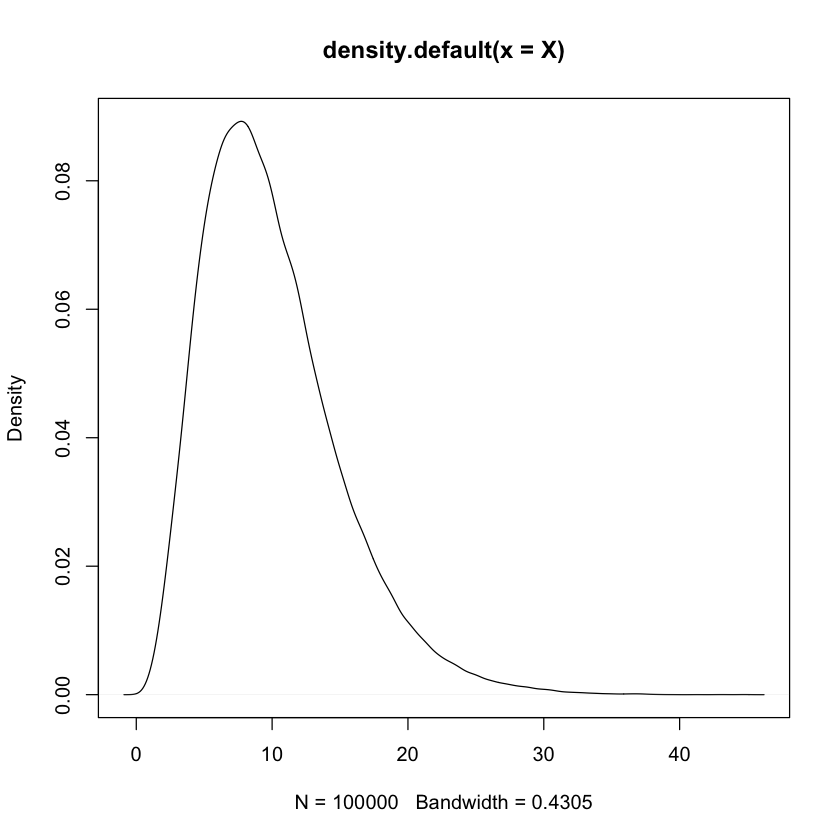

$acceptance
[1] 0.60623 0.22263 0.08227

$mean
[1] 9.986950 9.994791 9.874152

$sd
[1] 9.980875 9.961590 9.995412

$plot
NULL

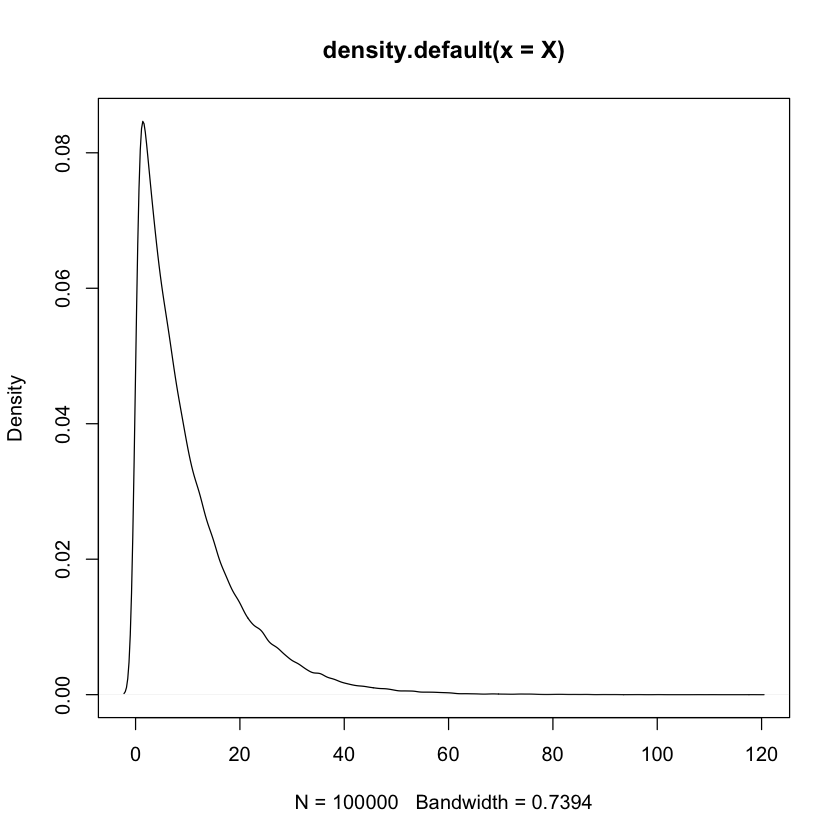

In [36]:
#INPUTS

xi <- 10
alpha_1 <- 4
alpha_2 <- 1
a <- c(5, 15, 25)
m <- 100000

#generate gamma over threshold
generate_gamma_thershold<-function(xi,alpha,a,m){
    X <- xi*rgamma(m,shape=alpha,rate=alpha)
    X1 <- X[X>a[1]]-a[1]
    X2 <- X[X>a[2]]-a[2]
    X3 <- X[X>a[3]]-a[3]
    
    results<-list("acceptance"=c(length(X1),length(X2),length(X3))/m,
                  "mean"=c(mean(X1),mean(X2),mean(X3)),
                  "sd"=c(sd(X1),sd(X2),sd(X3)),
                 "plot"=plot(density(X)))
    
    return(results)
}

#Run the function
generate_gamma_thershold(xi,alpha_1,a,m)
generate_gamma_thershold(xi,alpha_2,a,m)


## Exercise 2.27

In [37]:
# Input
xi <- 10
alpha <- 4
a <- 5
b <- c(10,15,20)
m <- 100000

#generate gamma truncated
generate_gamma_truncated<-function(xi,alpha,a,b,m){
    X <- xi*rgamma(m,shape=alpha,rate=alpha)
    X1 <- X[X>a&X<b[1]]
    X2 <- X[X>a&X<b[2]]
    X3 <- X[X>a&X<b[3]]

    
    results<-list("acceptance"=c(length(X1),length(X2),length(X3))/m,
                  "mean"=c(mean(X1),mean(X2),mean(X3)),
                  "sd"=c(sd(X1),sd(X2),sd(X3)))
    
    return(results)
}

#Run the function
generate_gamma_truncated(xi,alpha,a,b,m)

$acceptance
[1] 0.42608 0.70909 0.81731

$mean
[1]  7.511317  9.376306 10.393824

$sd
[1] 1.415750 2.690017 3.650117

## Exercise 2.28
On the blackboard

## Exercise 2.29

In [38]:
#INPUTS
alpha <- 2
beta <- 1
m <- 1e5

# GENERATE WEIBULL inverse method for exponential
U <- runif(m)
X <- beta*(-log(U))^(1/alpha)

#Calculate median and quartile difference
X.sort <- sort(X)
med <- X.sort[0.5*m]
qd <- X.sort[0.75*m]-X.sort[0.25*m]

#output
c(beta*(log(2))^(1/alpha),med)
c(beta*((log(4))^(1/alpha)-(log(4)-log(3))^(1/alpha)),qd)

[1] 0.8325546 0.8316143

[1] 0.6410500 0.6395291

# Exercise 2.30

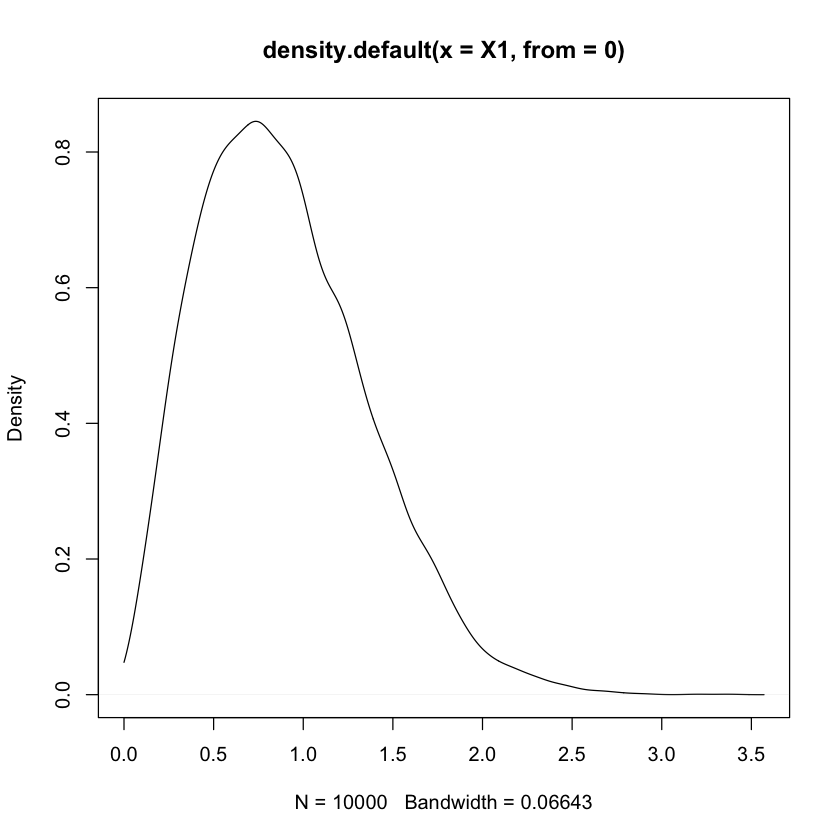

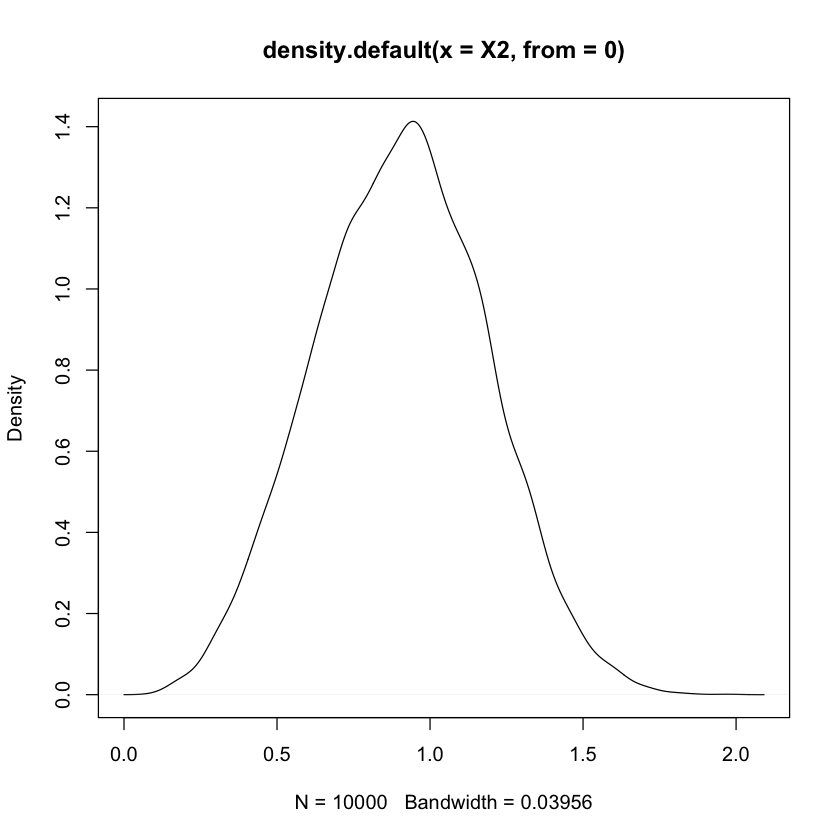

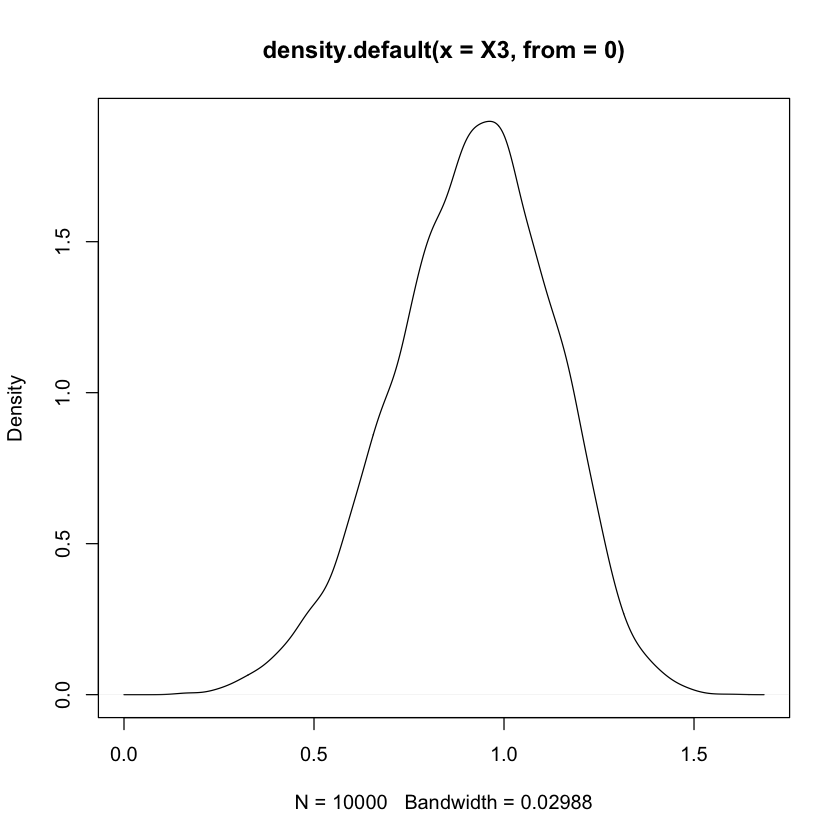

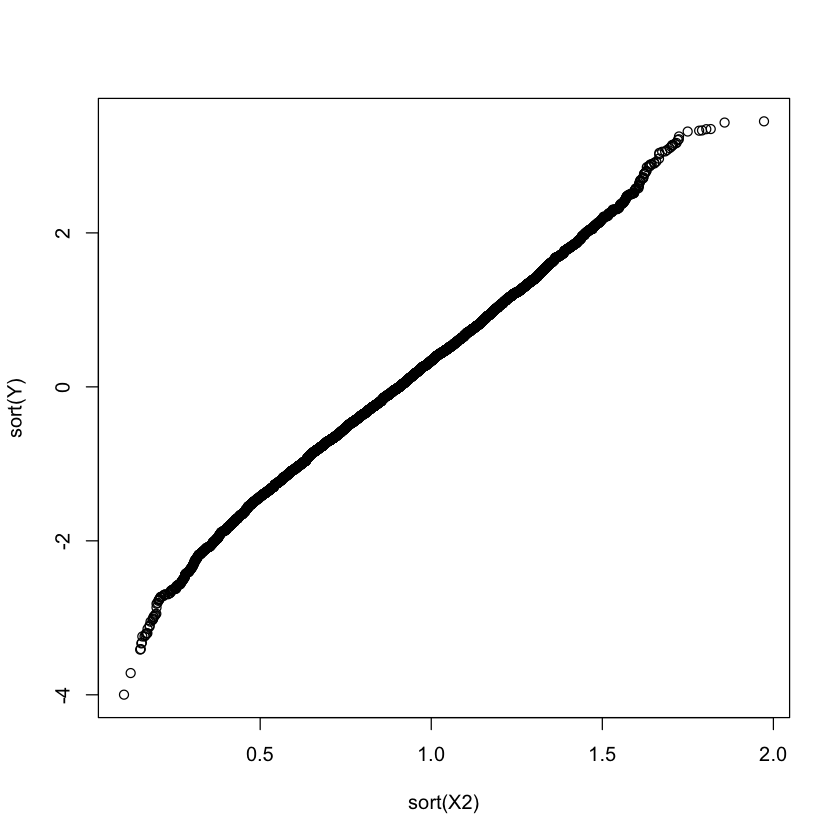

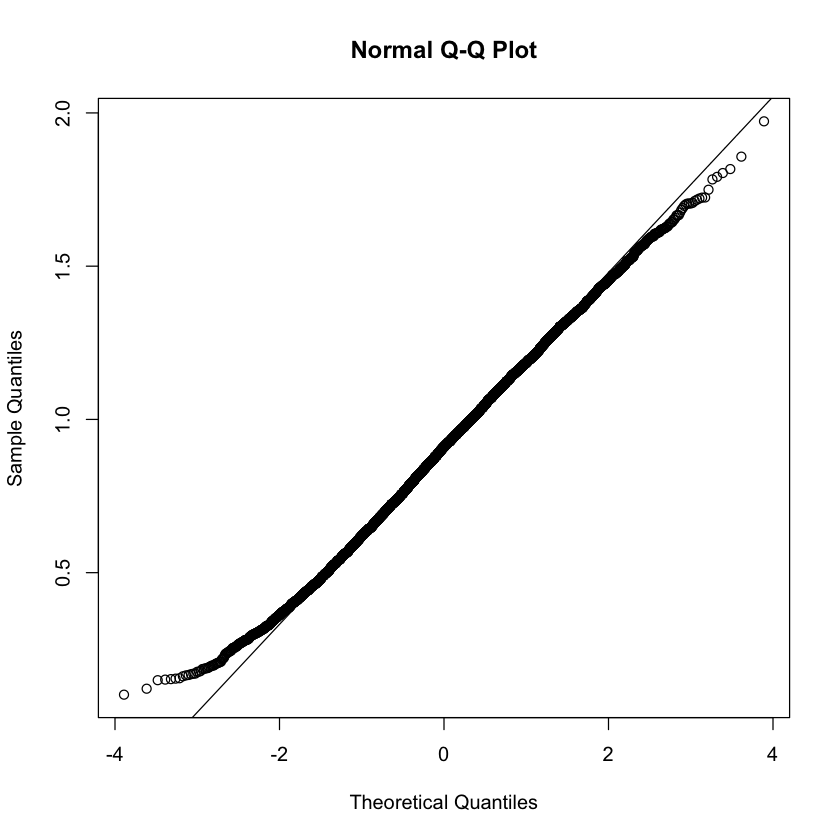

In [52]:
# INPUTS
beta <- 1
alpha <- c(2,3.6,5)
m <- 10000

#plot densities
X1 <- rweibull(m,alpha[1],beta)
plot(density(X1,from=0))

X2 <- rweibull(m,alpha[2],beta)
plot(density(X2,from=0))

X3 <- rweibull(m,alpha[3],beta)
plot(density(X3,from=0))

#plot QQ
Y <- rnorm(m)
plot(sort(X2),sort(Y))

qqnorm(X2)
qqline(X2)

## Exercise 2.34

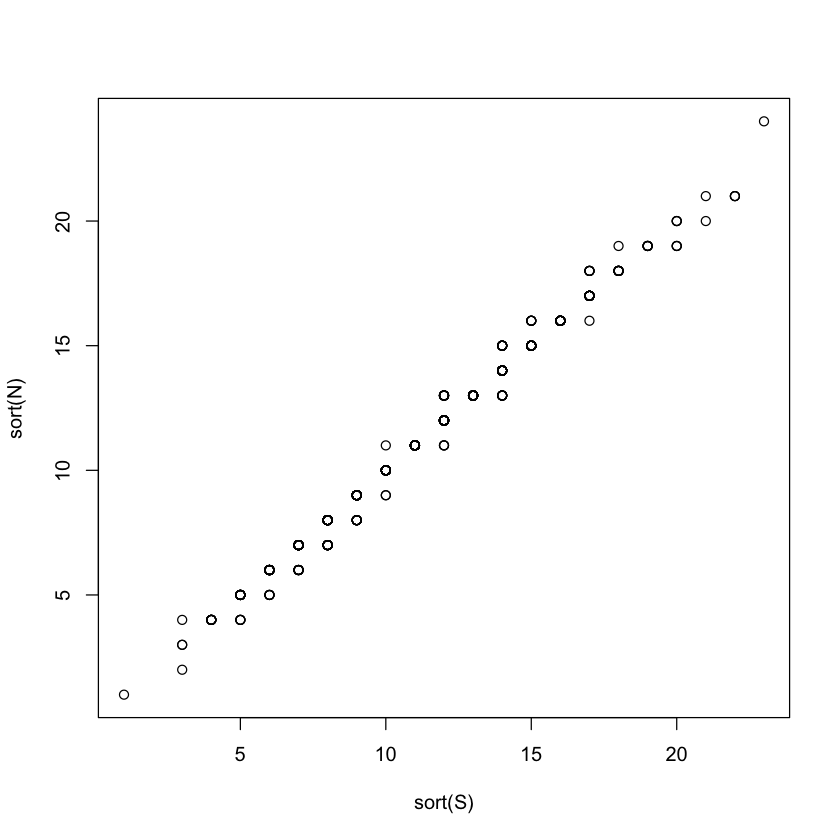

In [40]:
# INPUTS
lambda_1=4
lambda_2=7
m=1000

#generate_poisoon
S<-rpois(m,lambda_1)+rpois(m,lambda_2)
N<-rpois(m,lambda_1+lambda_2)

#plot
plot(sort(S),sort(N))

## Exercise 2.35

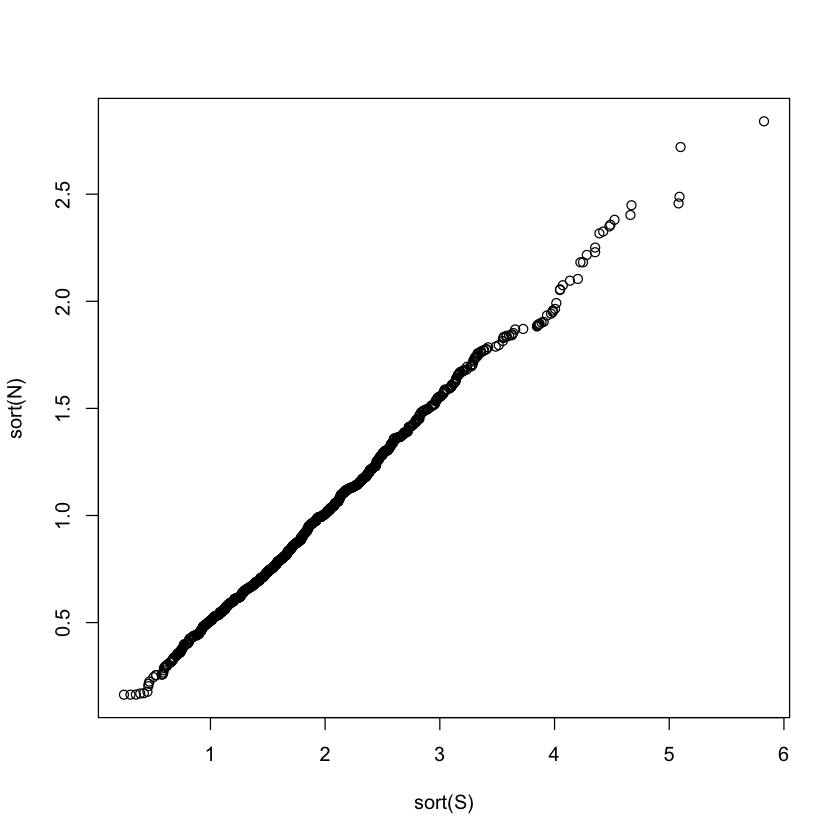

In [41]:
# INPUTS
alpha=2.5
m=1000

#generate gamma
S<-rgamma(m,shape=alpha,rate=alpha)+rgamma(m,shape=alpha,rate=alpha)
N<-rgamma(m,shape=2*alpha,rate=2*alpha)

#plot
plot(sort(S),sort(N))

# Chapter 7

## Exercise 7.8

Blackboard

## Exercise 7.9

In [42]:
#define loglikelihood function

llminuspareto <- function(beta,z){
  alphabeta <- 1/mean(log(1+z/beta))

  -log(alphabeta/beta)+(1+1/alphabeta)
} 

#INPUT
mb <- 10
n <- 10000
alpha <- 4
beta <- 1

print(paste("Results for n=",n))
for(i in 1:mb)
 {
   z <- beta*(runif(n)^(-1/alpha)-1)
   betahat <- optimize(llminuspareto,interval=c(0.001,100),z=z)$minimum
   alphahat <- 1/mean(log(1+z/betahat))
   print(c(alphahat,betahat))
 }

n <- 1000
print(paste("Results for n=",n))
for(i in 1:mb)
 {
   z <- beta*(runif(n)^(-1/alpha)-1)
   betahat <- optimize(llminuspareto,interval=c(0.001,100),z=z)$minimum
   alphahat <- 1/mean(log(1+z/betahat))
   print(c(alphahat,betahat))
 }

n <- 100
print(paste("Results for n=",n))
for(i in 1:mb)
 {
   z <- beta*(runif(n)^(-1/alpha)-1)
   betahat <- optimize(llminuspareto,interval=c(0.001,100),z=z)$minimum
   alphahat <- 1/mean(log(1+z/betahat))
   print(c(alphahat,betahat))
 }

[1] "Results for n= 10000"
[1] 4.170629 1.028637
[1] 4.037949 1.012462
[1] 3.8384306 0.9473147
[1] 4.327439 1.106246
[1] 3.809160 0.940768
[1] 4.036761 1.001476
[1] 4.251100 1.079827
[1] 4.283752 1.115949
[1] 4.635371 1.199360
[1] 3.9384047 0.9962392
[1] "Results for n= 1000"
[1] 5.003322 1.340333
[1] 4.395118 1.105532
[1] 5.220454 1.373289
[1] 4.590114 1.110704
[1] 4.404538 1.092926
[1] 5.571633 1.531008
[1] 4.084465 1.084263
[1] 3.4212715 0.7795059
[1] 3.3632574 0.8253514
[1] 3.9091582 0.9442602
[1] "Results for n= 100"
[1] 2.5050096 0.7591149
[1] 4.186949 1.052348
[1] 4.258140 1.222693
[1] 6.277035 1.460737
[1] 4.690686 1.122343
[1] 3.6764223 0.8902183
[1] 2.2898220 0.4644758
[1] 4.204183 1.194015
[1] 3.695041 0.991894
[1] 3.4527067 0.7617446


## Exercise 7.10

Blackboard

## Exercise 7.11

[1] 0.6336065 1.0142423

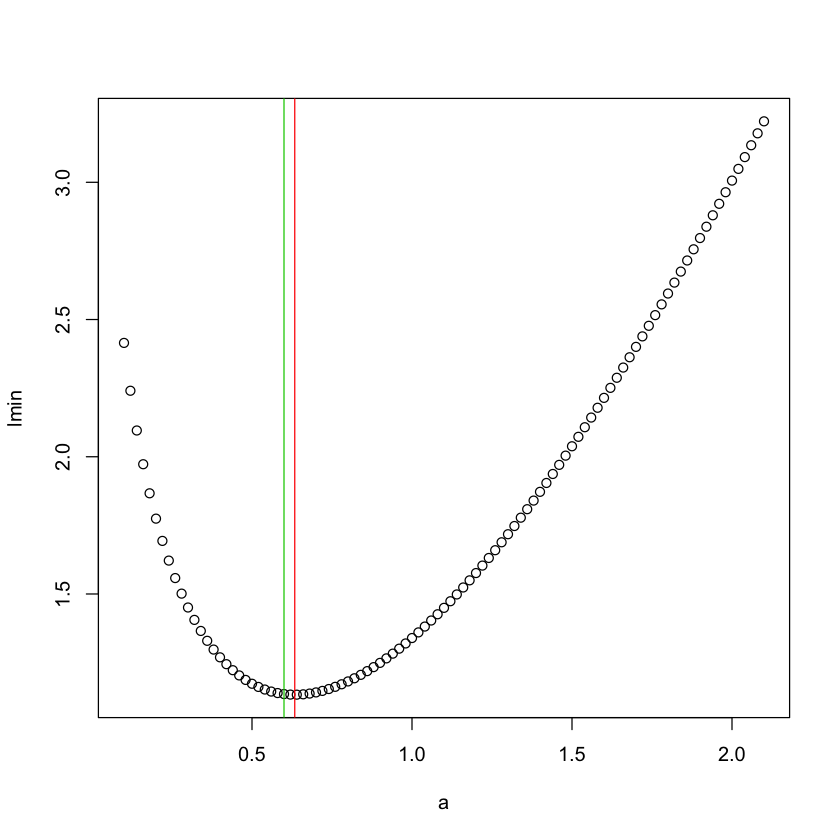

In [43]:
#define loglikelihood function
llminusweibull <- function(alpha,z){
   betaalpha <- (mean(z^alpha))^(1/alpha)

   return(-log(alpha)+alpha*log(betaalpha)-(alpha-1)*mean(log(z))+1)
 }

#inputs
alpha <- 0.6
beta <- 1
n <- 500

#simulate and plot
z <- rweibull(n,alpha,beta)
alpha1 <- 0.1
alpha2 <- 2.1
a <- seq(alpha1,alpha2,(alpha2-alpha1)/100)
lmin <- rep(0,length(a))
for(i in 1:length(a))
  lmin[i] <- llminusweibull(a[i],z) 
plot(a,lmin)

# estimate
o <- optimize(llminusweibull,c(0.0001,50),z=z)
alphahat <- o$minimum
betahat <- (mean(z^alphahat))^(1/alphahat)
c(alphahat,betahat)
abline(v=alphahat,col=2)
abline(v=alpha,col=3)

## Exercise 7.12

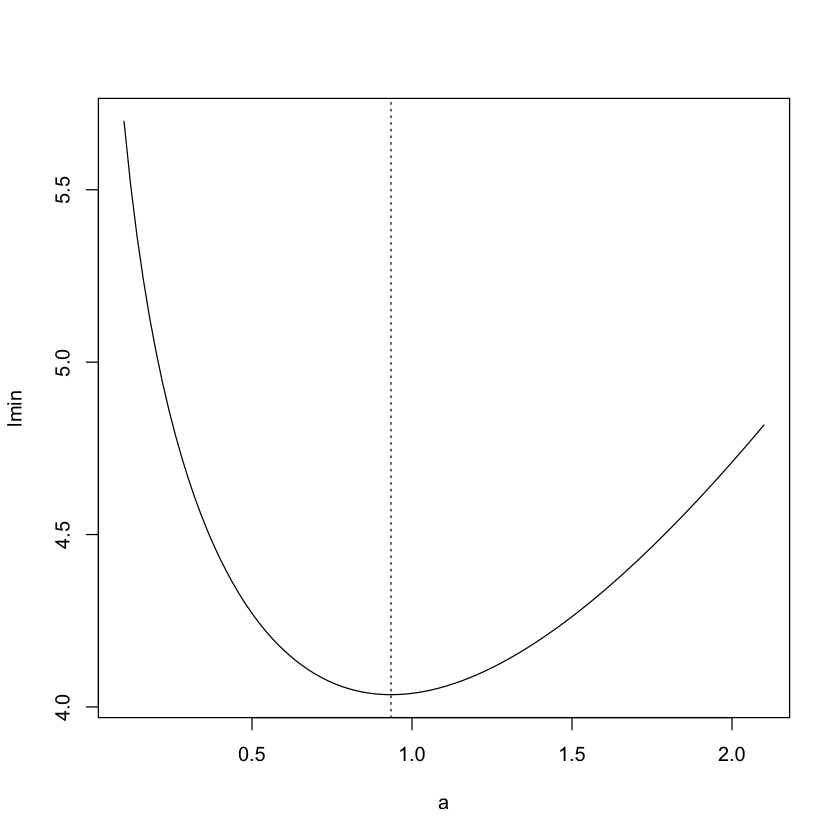

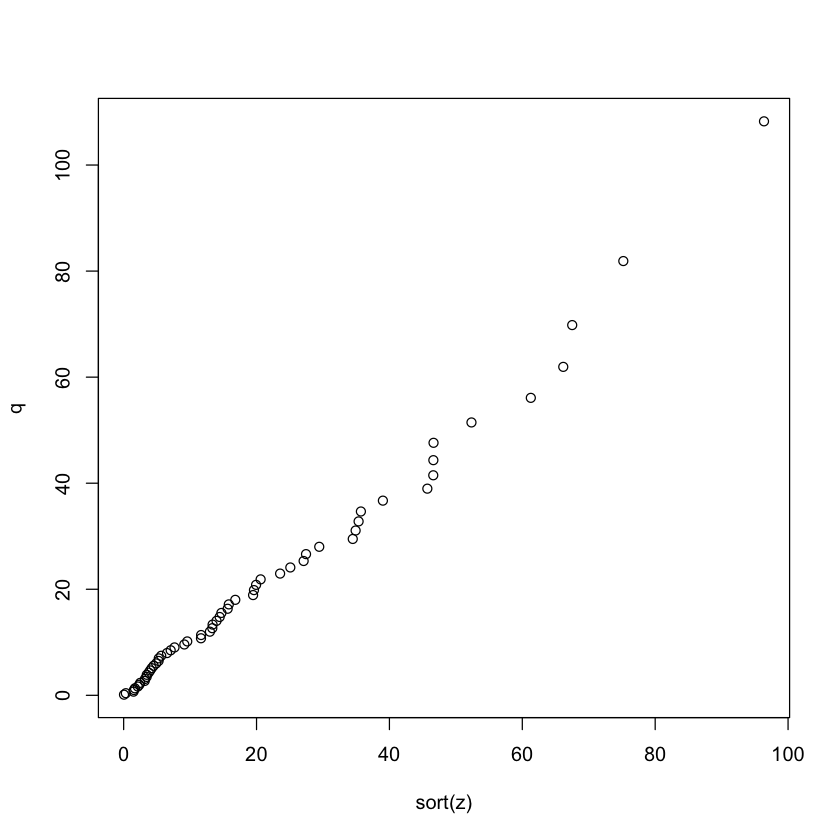

In [44]:
#define loglikelihood function
llminusweibull <- function(alpha,z){
   betaalpha <- (mean(z^alpha))^(1/alpha)

   -log(alpha)+alpha*log(betaalpha)-(alpha-1)*mean(log(z))+1
 }

# estimate
z <- scan("/studier/emner/matnat/math/STK3505/h20/belgianfire.txt")
alphahat <- optimize(llminusweibull,interval=c(0.001,100),z=z)$minimum
betahat <- (mean(z^alphahat))^(1/alphahat)

#plot loglikelihood
a <- seq(0.1,2.1,(2.1-0.1)/100)
lmin <- sapply(a,llminusweibull,z=z)
plot(a,lmin,type="l")
abline(v=alphahat,lty=3)

#plot QQ
n <- length(z)
u <- (1:n-0.5)/n
q <- qweibull(u,alphahat,betahat)
plot(sort(z),q)

# Exercise 7.13

In [45]:
x <- matrix(scan("/studier/emner/matnat/math/STK3505/h20/newyorkdaily.txt"), byrow=T, ncol=4)
xiHat <- apply(x, 2, mean)
sigmaHat <- apply(x, 2,sd)
kurtHat <- apply((t(x) - xiHat)**4, 1, mean)/(sigmaHat**4) - 3

kurtHat

[1] 66.96775 26.26331 42.65556 82.48216

# Bootstrap
## Exercise  1
We want to model the size of large claims for a property product. Assume that the real distribution is log-normal distribution with parameters $\mu=13$ and $\sigma=3$. This distribution is however unknown to us and we observe only m=1000 claims from that distribution.

Write the algorithm which
1. Simulate m claims from the real log-normal distribution. Plot the density estimate, and calculate mean and standard deviation.
2. Use the moment method to estimate the parameters of the distribution based on claims from 1.
3. Plot the QQ-plot of the log-normal distribution with estimated parameters against real parameters. Moreover, plot a QQ-plot of the log-normal distribution with estimated parameters against the sample.
4. Use the maximum likelihood estimators to estimate the parameters of the distribution based on claims from 1.
5. Plot the QQ-plot of the log-normal distribution with estimated parameters against real parameters. Moreover, plot a QQ-plot of the log-normal distribution with estimated parameters against the sample.
6. Use the bootstrap technique and resample $m_b=1000$ times the sample from 1. For each batch, estimate the parameters using both the moment method and MLE. 
7. Plot the estimated parameters against each other (i.e. mu against sigma) for both moment and maximum likelihood method.
8. For each parameter pair estimated with MLE from bootstrap batches, draw n=500 random variables from log-normal distribution and that estimated pair of parameters. We have therefore in total $n*m_b$ simulations. Plot there QQ-plots 

a. QQ-plot of the random vector simulated above against the real log-normal distribution,

b. QQ-plot of the random vector simulated above against then the lognormal distribution with parameters from 4,

c. QQ-plot of the random vector simulated above against then the sample from 1.



### Answer 1 
Simulate m claims from the real log-normal distribution.

[1] 19864609

[1] 138824249

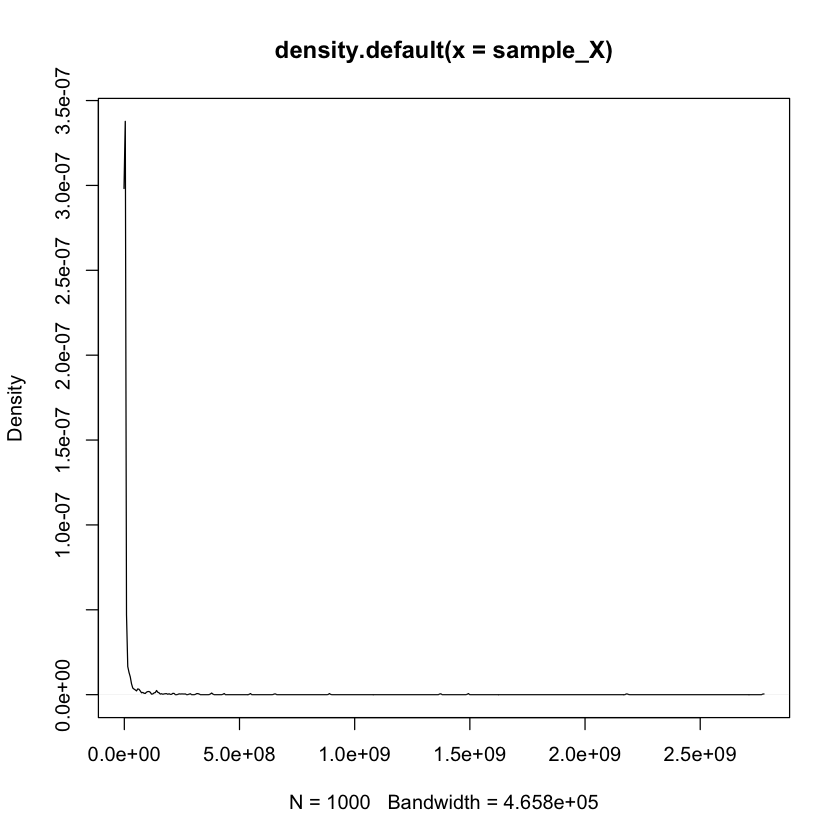

In [185]:
# Input
mu=13
sigma=3
m=1000

#draw the sample
sample_X<-exp(rnorm(n=m,mean=mu,sd=sigma))

#plot sample
plot(density(sample_X))
mean(sample_X)
sd(sample_X)

### answer 2
Use the moment method to estimate the parameters of the distribution based on claims from 1.

In [184]:
#define moment estimate function

# hatmu=log(average/(1+variance/average^2)^0.5)
# hatsigma=(log (1+variance/average^2))^0.5

estimate_moment<-function(sample){
    hatmu=log(mean(sample)/((1+(sd(sample)/mean(sample))^2)^0.5))
    hatsigma=(log(1+(sd(sample)/mean(sample))^2))^0.5
    
    return(c(hatmu,hatsigma))
}
parameters_mm<-estimate_moment(sample_X)
parameters_mm

exp(parameters_mm[1]+0.5*parameters_mm[2]^2)
(exp(parameters_mm[2]^2)-1)^0.5*exp(parameters_mm[1]+0.5*parameters_mm[2]^2)

[1] 15.138294  2.221012

[1] 44222343

[1] 519081581

### Answer 3
Plot the QQ-plot of the log-normal distribution with estimated parameters against real parameters. Moreover, plot a QQ-plot of the log-normal distribution with estimated parameters against the sample.

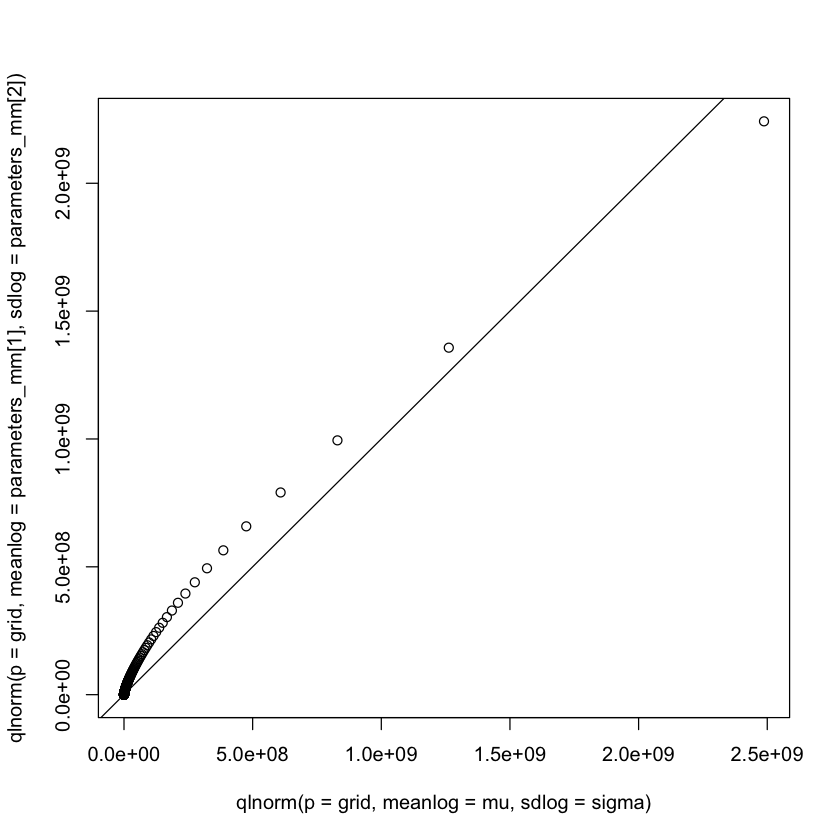

In [187]:
                 
grid=1:500/500

plot(qlnorm(p=grid,meanlog=mu,sdlog=sigma),qlnorm(p=grid,meanlog=parameters_mm[1],sdlog=parameters_mm[2]))
abline(a=0,b=1)

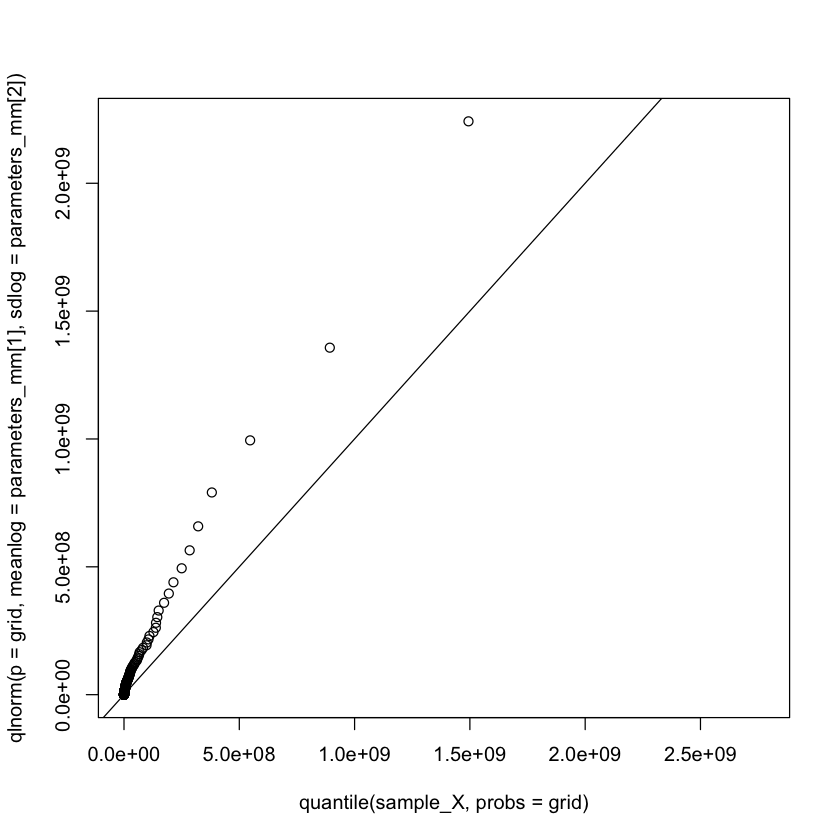

In [189]:
grid=1:500/500

plot(quantile(sample_X,probs=grid),qlnorm(p=grid,meanlog=parameters_mm[1],sdlog=parameters_mm[2]))
abline(a=0,b=1)

### Answer 4
Use the maximum likelihood estimators to estimate the parameters of the distribution based on claims from 1.

In [159]:
#define MLE function

# hatmu=log(average)
# hatsigma=average(ln(x)-hatmu)^2)

estimate_MLE<-function(sample){
    hatmu=(mean(log(sample)))
    hatsigma=(mean((log(sample)-hatmu)^2))^0.5
    
    return(c(hatmu,hatsigma))
}
parameters_MLE<-estimate_MLE(sample_X)
parameters_MLE

[1] 13.114885  3.042924

### Answer 5
Plot the QQ-plot of the log-normal distribution with estimated parameters against real parameters. Moreover, plot a QQ-plot of the log-normal distribution with estimated parameters against the sample.

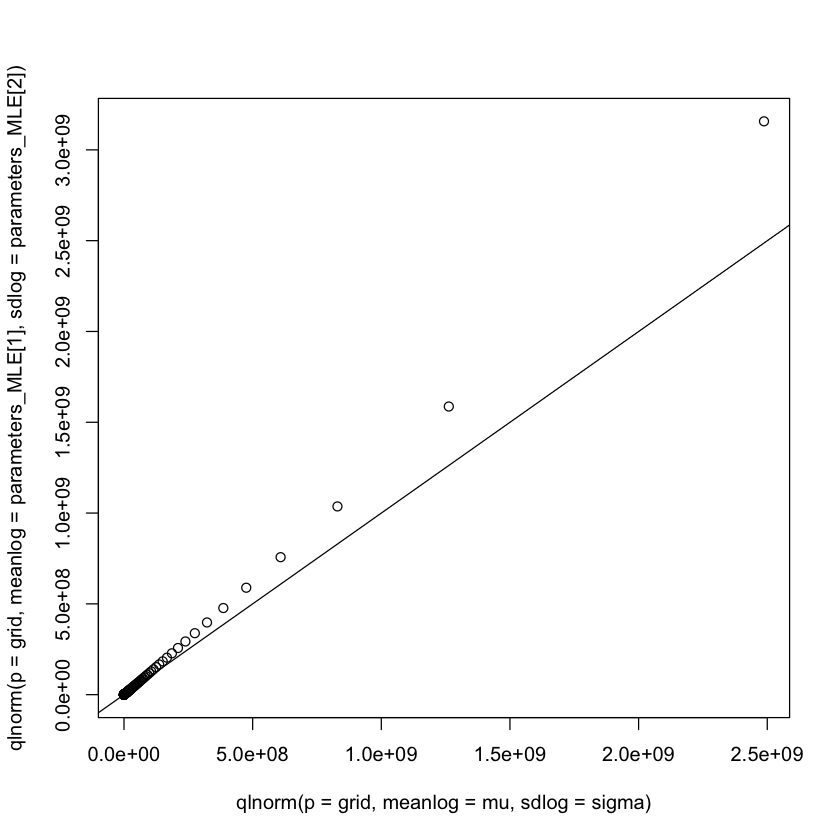

In [174]:
                 
grid=1:500/500

plot(qlnorm(p=grid,meanlog=mu,sdlog=sigma),qlnorm(p=grid,meanlog=parameters_MLE[1],sdlog=parameters_MLE[2]))
abline(a=0,b=1)

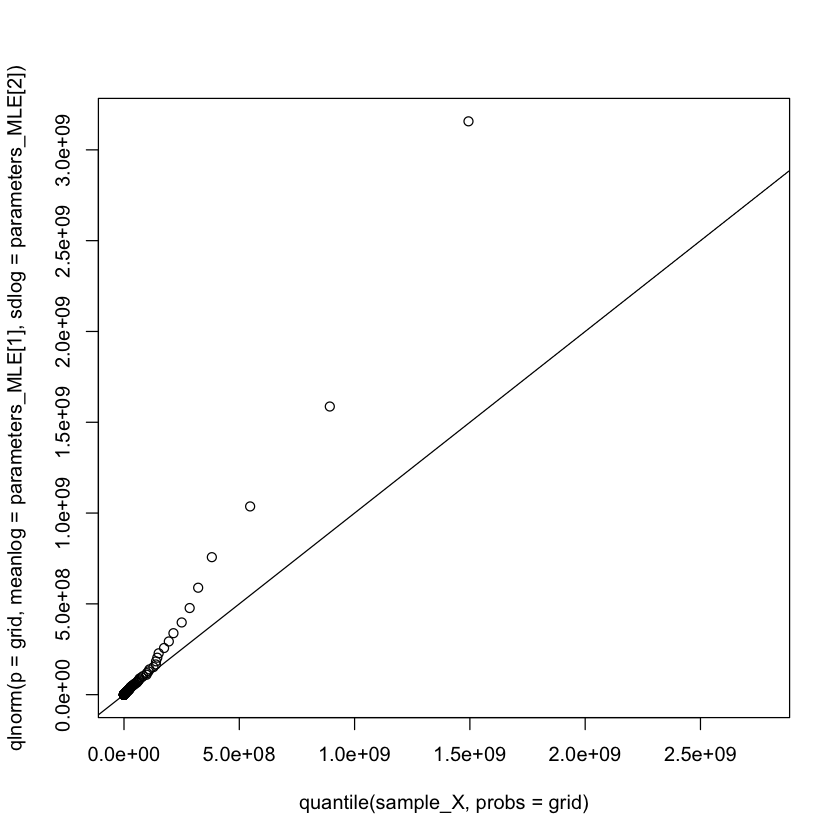

In [190]:
grid=1:500/500

plot(quantile(sample_X,probs=grid),qlnorm(p=grid,meanlog=parameters_MLE[1],sdlog=parameters_MLE[2]))
abline(a=0,b=1)

### Answer 6
Use the bootstrap technique and resample $m_b=1000$ times the sample from 1. For each batch, estimate the parameters using both the moment method and MLE. 

In [175]:
### Input
mb=1000

bootstrap_parameters_mm<-matrix(nrow=mb,ncol=2)
bootstrap_parameters_MLE<-matrix(nrow=mb,ncol=2)
for (i in 1:mb){
    sample_bootstrap<-sample(x=sample_X,size=m,replace=TRUE)
    bootstrap_parameters_mm[i,]<-estimate_moment(sample_bootstrap)
    bootstrap_parameters_MLE[i,]<-estimate_MLE(sample_bootstrap)
}

### Answer 7
Plot the estimated parameters against each other (i.e. mu against sigma) for both moment and maximum likelihood method

[1] "Bootstrapped parameters MM"


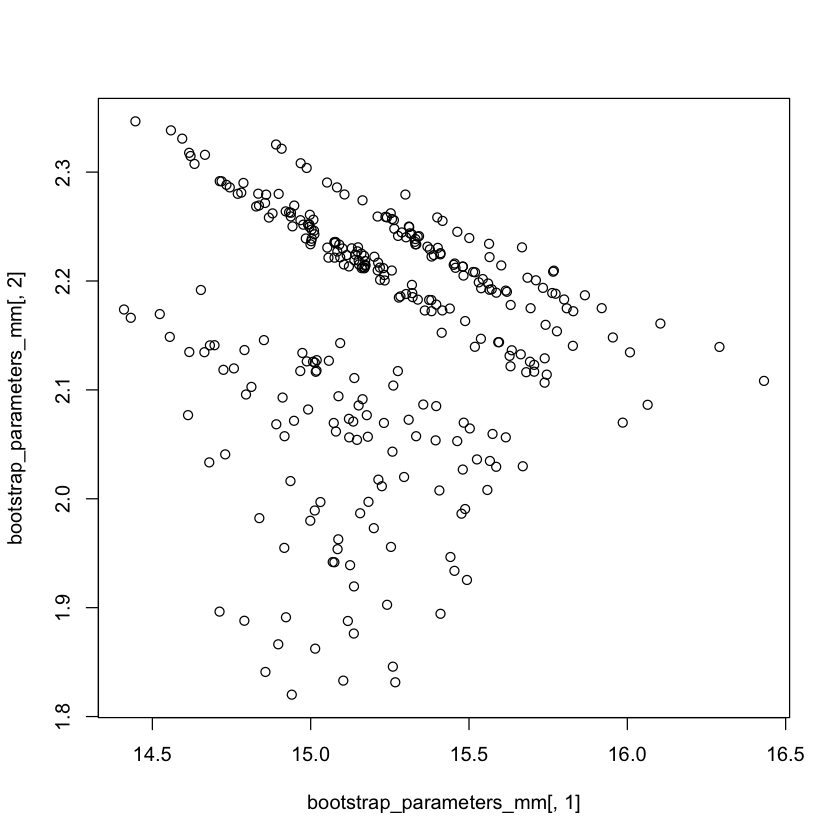

In [162]:
print("Bootstrapped parameters MM")
plot(bootstrap_parameters_mm[,1],bootstrap_parameters_mm[,2])

[1] "Bootstrapped parameters MLE"


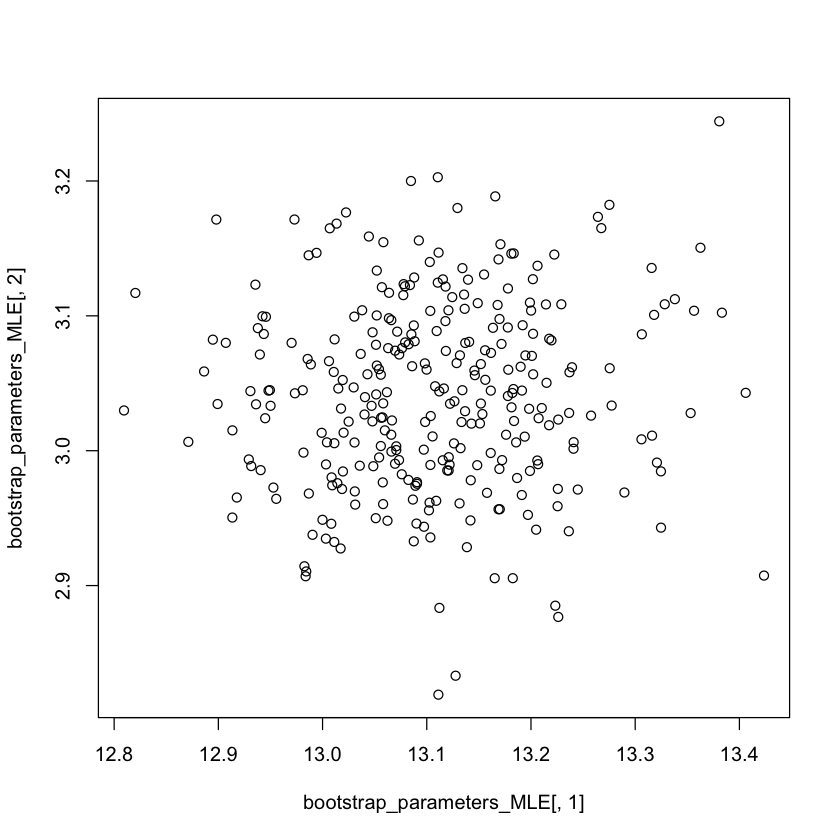

In [163]:
print("Bootstrapped parameters MLE")
plot(bootstrap_parameters_MLE[,1],bootstrap_parameters_MLE[,2])

### Answer 8
For each parameter pair estimated with MLE from bootstrap batches, draw n=500 random variables from log-normal distribution and that estimated pair of parameters. We have therefore in total $n*m_b$ simulations. Plot there QQ-plots 

a. QQ-plot of the random vector simulated above against the real log-normal distribution,

b. QQ-plot of the random vector simulated above against then the lognormal distribution with parameters from 4,

c. QQ-plot of the random vector simulated above against then the sample from 1.

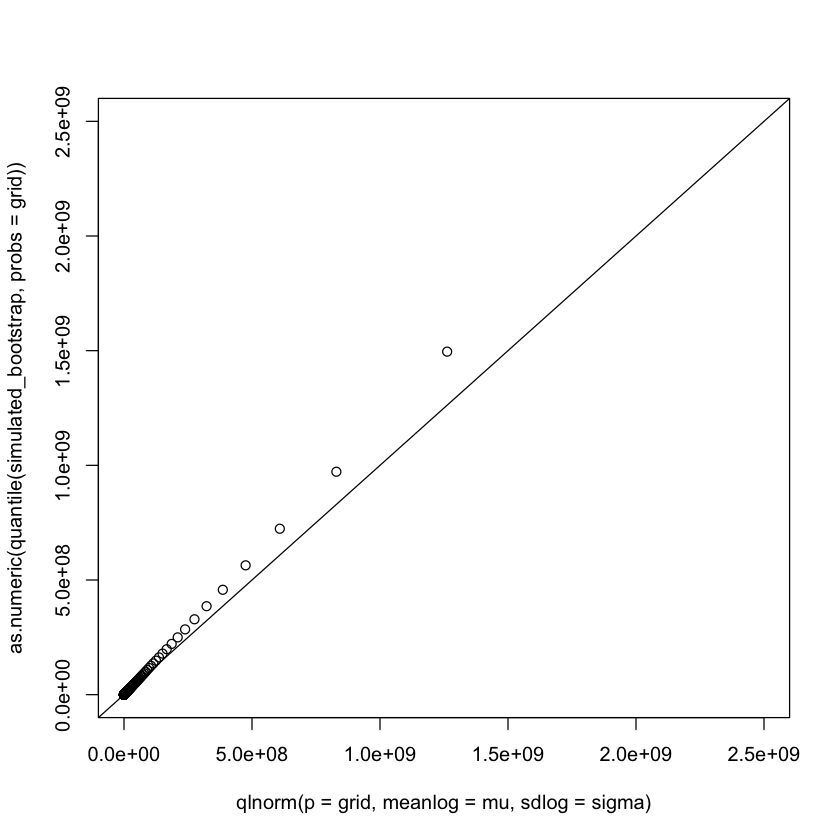

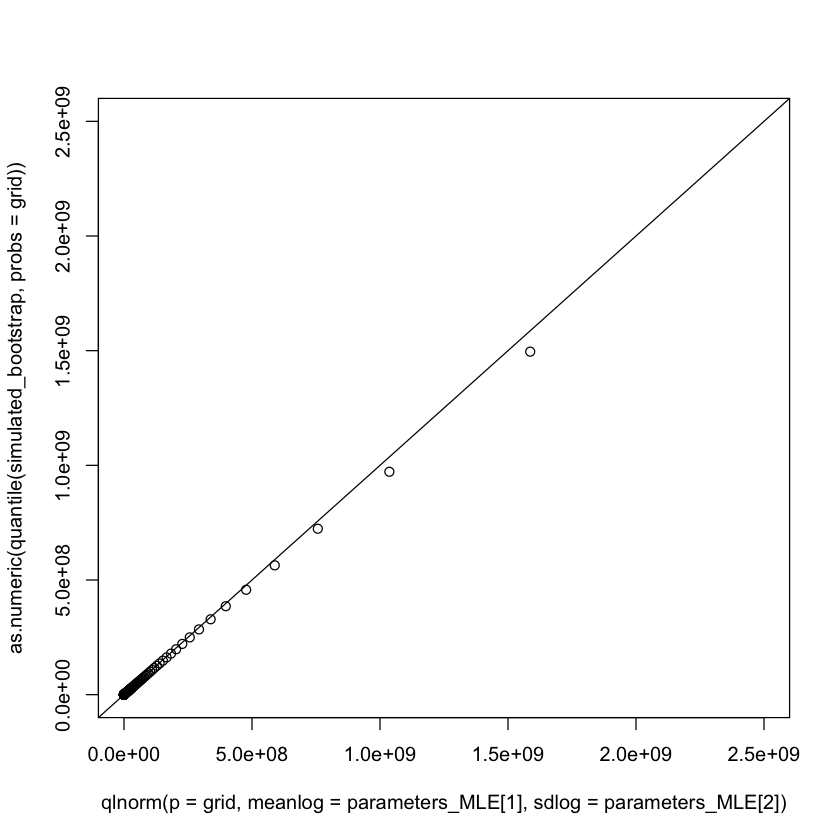

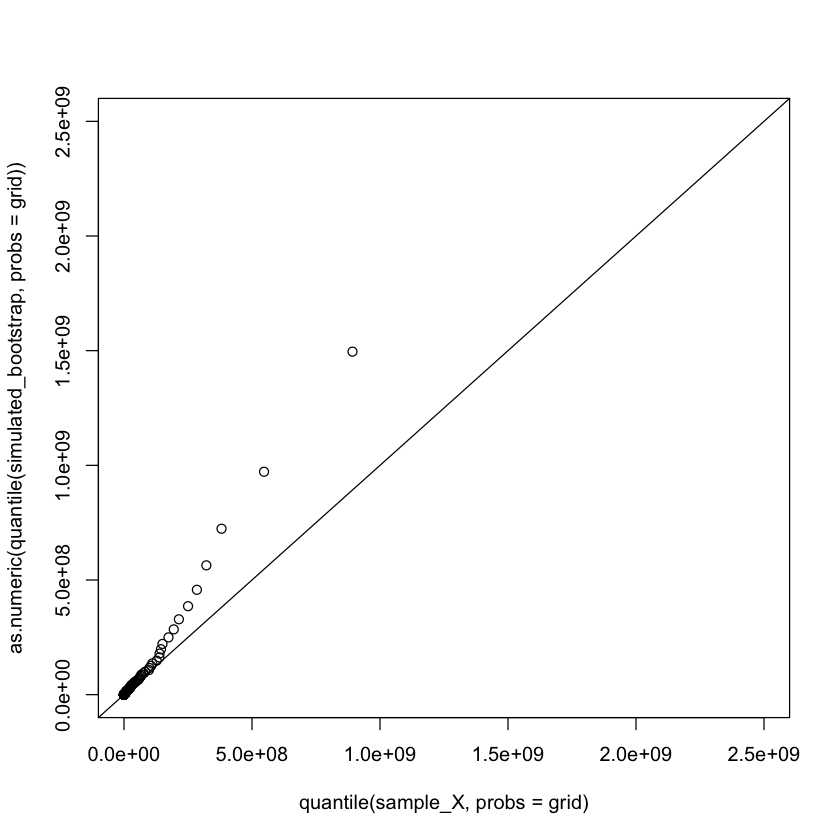

In [191]:
### Input
n=500

grid=(1:500)/500

simulated_bootstrap<-vector()

for (j in 1:mb){
    simulated_bootstrap<-c(simulated_bootstrap,exp(rnorm(n=n,
                                                      mean=bootstrap_parameters_MLE[j,1],
                                                      sd=bootstrap_parameters_MLE[j,2])))
}

plot(qlnorm(p=grid,meanlog=mu,sdlog=sigma),xlim=c(0,2.5e+9),as.numeric(quantile(simulated_bootstrap,probs=grid)),
     ylim=c(0,2.5e+9))
abline(a=0,b=1)

plot(qlnorm(p=grid,meanlog=parameters_MLE[1],sdlog=parameters_MLE[2]),xlim=c(0,2.5e+9),as.numeric(quantile(simulated_bootstrap,probs=grid)),
     ylim=c(0,2.5e+9))
abline(a=0,b=1)


plot(quantile(sample_X,probs=grid),xlim=c(0,2.5e+9),as.numeric(quantile(simulated_bootstrap,probs=grid)),
     ylim=c(0,2.5e+9))
abline(a=0,b=1)